In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [34]:
dataset = pd.read_csv(r'C:\Users\Ab215tx\Desktop\keras-frcnn-master\mot17det_09_final.csv',skiprows=0,header=None)
print(dataset.head())

   0   1     2    3    4    5  6  7        8
0  1   1   260  450  102  262  1  1  1.00000
1  1  19  1686  387  171  345  1  1  1.00000
2  1  20  1886  327  156  404  1  1  0.22293
3  1  21  1253  533   63  129  1  1  1.00000
4  1  22  1292  459   70  202  1  1  0.77624


In [35]:
dataset.to_csv('subm.txt',header=None,index=None,sep=',',mode='a')

In [18]:
dataset['x'] = dataset.iloc[:,2]
dataset['y'] = dataset.iloc[:,3]
dataset['width'] = dataset.iloc[:,4]
dataset['height'] = dataset.iloc[:,5]
dataset['class']= dataset.iloc[:,1]

In [19]:
print(dataset.head())

   0   1     2    3    4    5  6  7        8     x    y  width  height  class
0  1   1   260  450  102  262  1  1  1.00000   260  450    102     262      1
1  1  19  1686  387  171  345  1  1  1.00000  1686  387    171     345     19
2  1  20  1886  327  156  404  1  1  0.22293  1886  327    156     404     20
3  1  21  1253  533   63  129  1  1  1.00000  1253  533     63     129     21
4  1  22  1292  459   70  202  1  1  0.77624  1292  459     70     202     22


In [20]:
dataset.drop(dataset.columns[[1,2,3,4,5,6,7,8]], axis=1, inplace=True)
dataset.columns =['Frame','x','y','width','height','class']
print(dataset.head())

   Frame     x    y  width  height  class
0      1   260  450    102     262      1
1      1  1686  387    171     345     19
2      1  1886  327    156     404     20
3      1  1253  533     63     129     21
4      1  1292  459     70     202     22


In [21]:
train = pd.DataFrame(dataset)
print(train.head())

   Frame     x    y  width  height  class
0      1   260  450    102     262      1
1      1  1686  387    171     345     19
2      1  1886  327    156     404     20
3      1  1253  533     63     129     21
4      1  1292  459     70     202     22


In [76]:
#output = {'xmin' : xmin, 'xmax' : xmax, 'ymin' : ymin, 'ymax' : ymax, 'ID':id }
#output['Frame'] = dataset.iloc[:,0]
#train= pd.DataFrame(output)
#train.insert(6, 'Classs',1)
#print(train.head())
#print(len(train))

   Frame                      ID  xmax  xmin  ymax  ymin  Classs
0      1  <built-in function id>   362   260   450   712       1
1      1  <built-in function id>  1857  1686   387   732       1
2      1  <built-in function id>  2042  1886   327   731       1
3      1  <built-in function id>  1316  1253   533   662       1
4      1  <built-in function id>  1362  1292   459   661       1
10412


In [22]:
for i in range(len(train)):
    train.iloc[i,0] = "datanew/"+"frame"+str(train.iloc[i,0]-1)+".jpg"
print(train.head(20))

                 Frame     x    y  width  height  class
0   datanew/frame0.jpg   260  450    102     262      1
1   datanew/frame0.jpg  1686  387    171     345     19
2   datanew/frame0.jpg  1886  327    156     404     20
3   datanew/frame0.jpg  1253  533     63     129     21
4   datanew/frame0.jpg  1292  459     70     202     22
5   datanew/frame0.jpg  -348  235    477     695     23
6   datanew/frame0.jpg  1035  174    136     532     25
7   datanew/frame0.jpg   116  522     84     230     26
8   datanew/frame0.jpg   234  395     21     440     27
9   datanew/frame0.jpg  1682  470     65     122     28
10  datanew/frame0.jpg    42  502     85     254     30
11  datanew/frame0.jpg   863  522     46     108     31
12  datanew/frame0.jpg   751  506     95     182     44
13  datanew/frame1.jpg   262  449    102     263      1
14  datanew/frame1.jpg  1685  386    170     347     19
15  datanew/frame1.jpg  1883  326    157     406     20
16  datanew/frame1.jpg  1256  534     62     127

In [23]:
train.to_csv('annotatefinal.txt',header=None,index=None,sep=',',mode='a')

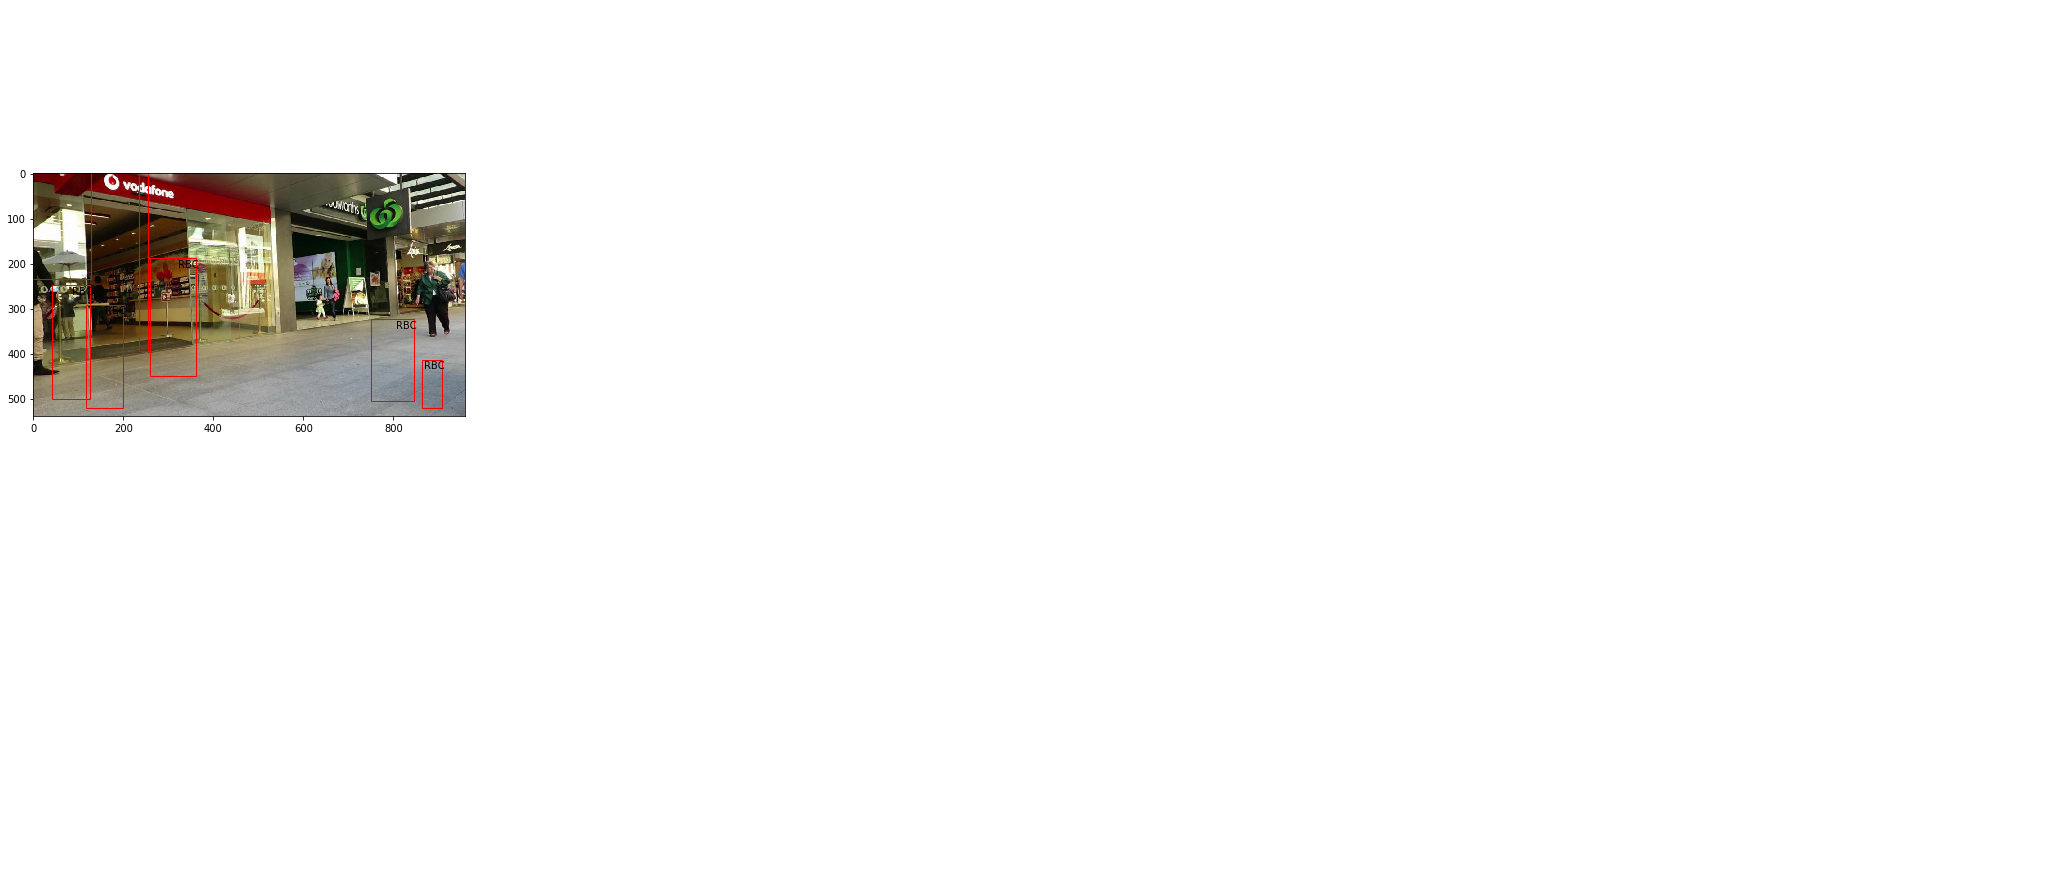

In [70]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import patches

fig = plt.figure()

#add axes to the image
ax = fig.add_axes([0,0,1,1])

# read and plot the image
image = plt.imread('data/frame0.jpg')
plt.imshow(image)

# iterating over the image for different objects
for _,row in train[train.Frame == "frame0.jpg"].iterrows():
    xmin = row.xmin
    xmax = row.xmax
    ymin = row.ymin
    ymax = row.ymax
    
    width = xmax - xmin
    height = ymax - ymin
    
    edgecolor = 'r'
    ax.annotate('RBC', xy=(xmax-40,ymin+20))
    # assign different color to different classes of objects
    #if row.class == str(1):
        #edgecolor = 'r'
        #ax.annotate('RBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(19):
        #edgecolor = 'b'
        #ax.annotate('WBC', xy=(xmax-40,ymin+20))
    #elif row.class == str(20):
        #edgecolor = 'g'
        #ax.annotate('Platelets', xy=(xmax-40,ymin+20))
        
    # add bounding boxes to the image
    rect = patches.Rectangle((xmin,ymin), width, height, edgecolor = edgecolor, facecolor = 'none')
    
    ax.add_patch(rect)